In [15]:
#import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [16]:
%load_ext autoreload
%autoreload 2
import kl_ucb_policy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## UCB

t & Reward : 5000 495 3950 4445
t, Nb de tirages sous-optimal, Pseudo-Regret : 5000 607 60.7


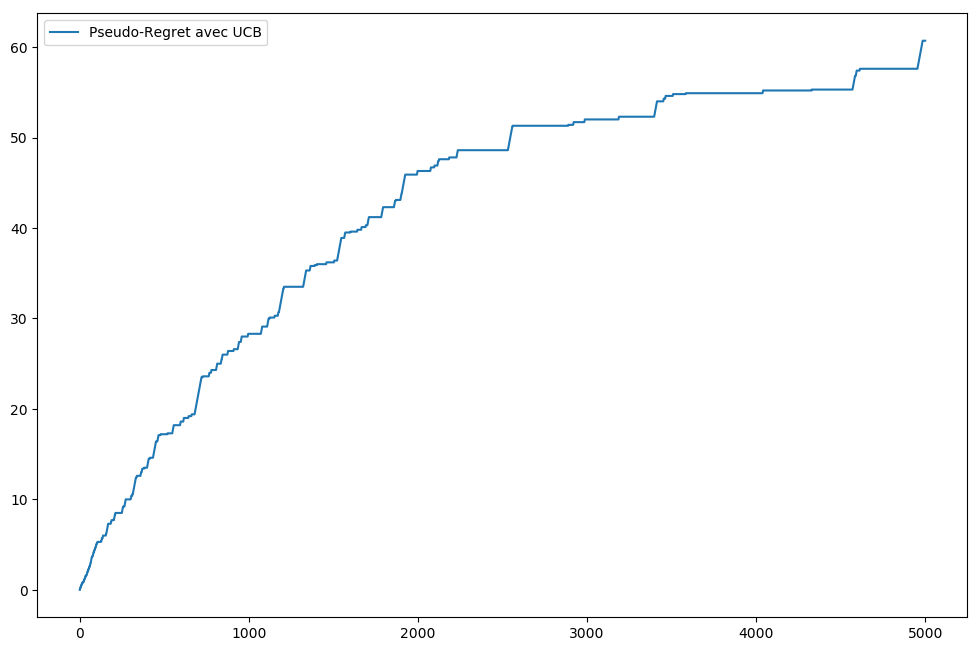

In [17]:
%matplotlib inline
# KL UCB project

#D'abord UCB avec 2 bras
K=2 #2 bras qui suivent Bernoulli

p = np.array([0.8, 0.9]) #Param des Bernoulli
delta=0.1

T= 5000 #Nb max d'iterations

alpha=2.5

N = np.array([0, 0]) #Nb de fois ou le bras 1 ou 2 a été tiré

Reward = np.zeros((2,T+1),dtype=np.int) #Recompense avec chaque bras

Action = np.zeros((2,T+1),dtype=np.int) #Bras choisi a chaque étape

UCB= np.array([0., 0.]) #UCB pour chaque bras

#On commence en explorant les 2 bras au moins une fois
#A t=1

N[0]=1
Reward[0,1]= np.random.binomial(1, p[0])
Action[0,1]=1

#A t=2
N[1]=1
Reward[1,2]= np.random.binomial(1, p[1])
Action[1,2]=1


#A t=3
for t in range(3, T+1):
    #Added slight optimization (sum only up to t)
    UCB[0] = sum(Reward[0,:t])/N[0]+np.sqrt( (alpha*math.log(t))/(2*N[0]) )
    UCB[1] = sum(Reward[1,:t])/N[1]+np.sqrt( (alpha*math.log(t))/(2*N[1]) )
    #print("t & UCB :",t,UCB)
    
    select = np.argmax(UCB)
    N[select]=N[select]+1
    Action[select,t]=1
    Reward[select,t]= np.random.binomial(1,p[select])

# Now using argmax instead    
#    if UCB[0]>= UCB[1]:
#        N[0]=N[0]+1
#        Reward[0,t]= np.random.binomial(1,p[0])
#    else:
#        N[1]=N[1]+1
#        Reward[1,t]= np.random.binomial(1,p[1])        

print("t & Reward :",t,sum(Reward[0,:]),sum(Reward[1,:]),sum(Reward[0,:])+sum(Reward[1,:]) )


totalReward=np.cumsum(Reward,axis=1) #Reward accumulé en fonction du temps

   
#fig=plt.figure(figsize=(12,8))
##fig=plt.figure()  
#ax1 = fig.add_subplot(1,1,1)
##ax1.plot(c_error,marker='.',linestyle='-',label='Online avec gradient à pas constant')
#ax1.plot(totalReward[0,:],linestyle='-',label='Gain avec bras 1')
#ax1.plot(totalReward[1,:],linestyle='-',label='Gain avec bras 2')
#ax1.plot(totalReward[0,:]+totalReward[1,:],linestyle='-',label='Gain total UCB')
#ax1.legend(loc='best')
#plt.show()

totalAction=np.cumsum(Action,axis=1)
print("t, Nb de tirages sous-optimal, Pseudo-Regret :",t,totalAction[0,t],totalAction[0,t]*delta)

fig=plt.figure(figsize=(12,8))
##fig=plt.figure()  
ax1 = fig.add_subplot(1,1,1)
##ax1.plot(c_error,marker='.',linestyle='-',label='Online avec gradient à pas constant')
ax1.plot(totalAction[0,:]*delta,linestyle='-',label='Pseudo-Regret avec UCB')
#ax1.plot(totalReward[1,:],linestyle='-',label='Gain avec bras 2')
#ax1.plot(totalReward[0,:]+totalReward[1,:],linestyle='-',label='Gain total UCB')
ax1.legend(loc='best')
plt.show()

## KL-UCB

In [18]:
# KL-UCB avec 2 bras
K=2 #2 bras qui suivent Bernoulli
delta=0.1
T= 5000 #Nb max d'iterations

p = np.array([0.8, 0.9]) #Param des Bernoulli

klucb = kl_ucb_policy.KLUCBPolicy(K, delta)

In [19]:
%%capture
klucb.reset()
Actions_klucb = np.zeros((K,T+1),dtype=np.int)
Rewards_klucb = np.zeros((K,T+1),dtype=np.int)

for t in range(T+1):
    arm_klucb = klucb.selectNextArm()
    #print("arm :", arm)
    reward_klucb = np.random.binomial(1, p[arm_klucb])
    Actions_klucb[arm_klucb,t]=1
    Rewards_klucb[arm_klucb,t]=reward_klucb
    klucb.updateState(arm_klucb, reward_klucb)

In [20]:
print("t & Reward :",t,klucb.S[0],klucb.S[1],klucb.S[0]+klucb.S[1])

t & Reward : 5000 96.0 4368.0 4464.0


t, Nb de tirages sous-optimal, Pseudo-Regret : 5000 126 12.6


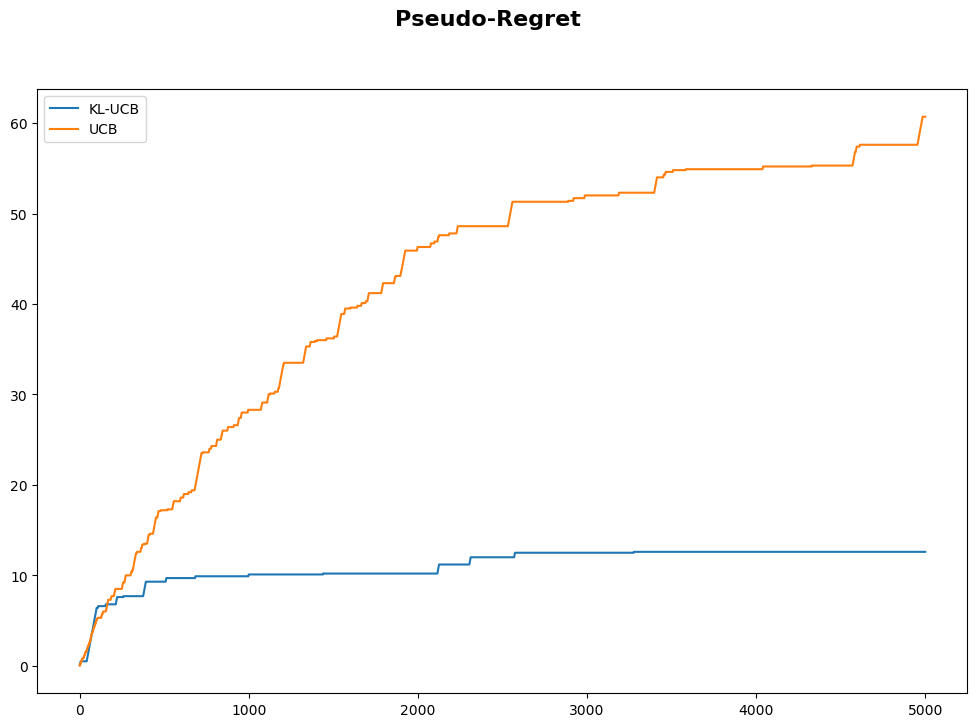

In [22]:
totalReward_klucb=np.cumsum(Rewards_klucb,axis=1) #Reward accumulé en fonction du temps

totalAction_klucb=np.cumsum(Actions_klucb,axis=1)
print("t, Nb de tirages sous-optimal, Pseudo-Regret :",t,totalAction_klucb[0,t],totalAction_klucb[0,t]*delta)

fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
##ax1.plot(c_error,marker='.',linestyle='-',label='Online avec gradient à pas constant')
plt.suptitle("Pseudo-Regret",fontweight='bold',size=16)
ax1.plot(totalAction_klucb[0,:]*delta,linestyle='-',label='KL-UCB')
ax1.plot(totalAction[0,:]*delta,linestyle='-',label='UCB')
#ax1.plot(totalReward[1,:],linestyle='-',label='Gain avec bras 2')
#ax1.plot(totalReward[0,:]+totalReward[1,:],linestyle='-',label='Gain total UCB')
ax1.legend(loc='best')
plt.show()